In [2]:
%load_ext autoreload
%autoreload 2

In [15]:
import pandas as pd
pd.set_option("display.max_columns", 100)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
ls data/

ACS_14_5YR_employment/            CAMP/
ACS_14_5YR_health_insur_coverage/ amfAR/
ACS_14_5YR_income/                main-df.csv
ACS_14_5YR_poverty/


In [7]:
df = pd.read_csv('data/main-df.csv')

# Initial look at data
## Overview
It looks like we have one row per county nationally.

From Wikipedia:

>_As of 2016, there were 3,007 counties, 64 parishes, 19 organized boroughs, 10 census areas, 41 independent cities, and the District of Columbia for a total of **3,142** counties and county-equivalents in the 50 states and District of Columbia._

How does this compare to our data?

**Number of counties:** 3140

**Number of states:** 51

So we have all of the states, plus D.C., and we're only missing two counties (or county-equivalents).

## HIV column definitions
1. **HIVdiagnoses:** Number of new HIV diagnoses in one year, among adults and adolescents 13 and older.
2. **HIVincidence:** Number of new HIV diagnoses per 100,000 in one year.
3. **HIVprevalence:** Number of people living with diagnosed HIV per 100,000, among adults and adolescents 13 and older.

## Missing Data
**Missing data:**
- These are all floats: mme_percap, partD30dayrxrate, drugdep, pctunmetneed, nonmedpain

**Data types:**
1. Year - could maybe convert to datetime

## Outliers
- There's a big HIVincidence outlier with a value of ~750.

In [34]:
df.head(200)

county_code               COUNTY STATEABBREVIATION  YEAR  AMAT_fac  \
0           1001       Autauga County                AL  2015       0.0   
1           1003       Baldwin County                AL  2015       0.0   
2           1005       Barbour County                AL  2015       0.0   
3           1007          Bibb County                AL  2015       0.0   
4           1009        Blount County                AL  2015       0.0   
5           1011       Bullock County                AL  2015       0.0   
6           1013        Butler County                AL  2015       0.0   
7           1015       Calhoun County                AL  2015       0.0   
8           1017      Chambers County                AL  2015       0.0   
9           1019      Cherokee County                AL  2015       0.0   
10          1021       Chilton County                AL  2015       1.0   
11          1023       Choctaw County                AL  2015       0.0   
12          1025        Clarke County                AL  2015       0.0   
13          1027          Clay County                AL  2015       0.0   
14          1029      Cleburne County                AL  2015       0.0   
15          1031        Coffee County                AL  2015       0.0   
16          1033       Colbert County                AL  2015       0.0   
17          1035       Conecuh County                AL  2015       0.0   
18          1037         Coosa County                AL  2015       0.0   
19          1039     Covington County                AL  2015       0.0   
20          1041      Crenshaw County                AL  2015       0.0   
21          1043       Cullman County                AL  2015       0.0   
22          1045          Dale County                AL  2015       0.0   
23          1047        Dallas County                AL  2015       0.0   
24          1049        DeKalb County                AL  2015       0.0   
25          1051        Elmore County                AL  2015       0.0   
26          1053      Escambia County                AL  2015       0.0   
27          1055        Etowah County                AL  2015       0.0   
28          1057       Fayette County                AL  2015       0.0   
29          1059      Franklin County                AL  2015       0.0   
..           ...                  ...               ...   ...       ...   
170         5121      Randolph County                AR  2015       0.0   
171         5123   St. Francis County                AR  2015       0.0   
172         5125        Saline County                AR  2015       0.0   
173         5127         Scott County                AR  2015       0.0   
174         5129        Searcy County                AR  2015       0.0   
175         5131     Sebastian County                AR  2015       0.0   
176         5133        Sevier County                AR  2015       0.0   
177         5135         Sharp County                AR  2015       0.0   
178         5137         Stone County                AR  2015       0.0   
179         5139         Union County                AR  2015       0.0   
180         5141     Van Buren County                AR  2015       0.0   
181         5143    Washington County                AR  2015       0.0   
182         5145         White County                AR  2015       0.0   
183         5147      Woodruff County                AR  2015       0.0   
184         5149          Yell County                AR  2015       0.0   
185         6001       Alameda County                CA  2015       2.0   
186         6003        Alpine County                CA  2015       0.0   
187         6005        Amador County                CA  2015       0.0   
188         6007         Butte County                CA  2015       0.0   
189         6009     Calaveras County                CA  2015       0.0   
190         6011        Colusa County                CA  2015       0.0   
191         6013  Contra Costa

In [37]:
print("Number of states in our data:", len(df['STATEABBREVIATION'].unique()))

Number of states in our data: 51


In [44]:
print("Number of counties in our data:", df.groupby(['STATEABBREVIATION', 'COUNTY']).size().shape[0])

Number of counties in our data: 3140


In [47]:
df.shape

(3140, 38)

## Missing data and data types
**Missing data:**
- These are all floats: mme_percap, partD30dayrxrate, drugdep, pctunmetneed, nonmedpain

**Data types:**
1. Year - could maybe convert to datetime

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 38 columns):
county_code          3140 non-null int64
COUNTY               3140 non-null object
STATEABBREVIATION    3140 non-null object
YEAR                 3140 non-null int64
AMAT_fac             3140 non-null float64
HIVdiagnoses         3140 non-null float64
HIVincidence         3140 non-null float64
HIVprevalence        3140 non-null float64
MH_fac               3140 non-null float64
Med_AMAT_fac         3140 non-null float64
Med_MH_fac           3140 non-null float64
Med_SA_fac           3140 non-null float64
Med_SMAT_fac         3140 non-null float64
Med_TMAT_fac         3140 non-null float64
PLHIV                3140 non-null float64
Population           3140 non-null float64
SA_fac               3140 non-null float64
SMAT_fac             3140 non-null float64
TMAT_fac             3140 non-null float64
drugdeathrate        3140 non-null float64
drugdeathrate_est    3140 non-null floa

In [66]:
df.describe()

county_code    YEAR     AMAT_fac  HIVdiagnoses  HIVincidence  \
count   3140.000000  3140.0  3140.000000   3140.000000   3140.000000   
mean   30387.632484  2015.0     0.085669     11.879936      4.046911   
std    15156.372045     0.0     0.450816     69.947292     16.575690   
min     1001.000000  2015.0     0.000000      0.000000      0.000000   
25%    18178.500000  2015.0     0.000000      0.000000      0.000000   
50%    29176.000000  2015.0     0.000000      0.000000      0.000000   
75%    45079.500000  2015.0     0.000000      0.000000      0.000000   
max    56045.000000  2015.0     8.000000   1972.000000    771.400000   

       HIVprevalence       MH_fac  Med_AMAT_fac   Med_MH_fac   Med_SA_fac  \
count    3140.000000  3140.000000   3140.000000  3140.000000  3140.000000   
mean      145.400446     3.290127      0.058917     2.934395     2.260191   
std       198.488980     8.591740      0.369298     7.401998     6.050821   
min         0.000000     0.000000      0.000000     0.000000     0.000000   
25%        32.950000     0.000000      0.000000     0.000000     0.000000   
50%        89.000000     1.000000      0.000000     1.000000     1.000000   
75%       183.775000     3.000000      0.000000     3.000000     2.000000   
max      2590.200000   192.000000      5.000000   133.000000   125.000000   

       Med_SMAT_fac  Med_TMAT_fac       PLHIV    Population       SA_fac  \
count   3140.000000    3140.00000   3140.0000  3.140000e+03  3140.000000   
mean       0.879618       0.43949    295.7000  1.021892e+05     3.761465   
std        3.246803       1.78178   1761.2942  3.282240e+05    11.738908   
min        0.000000       0.00000      0.0000  8.800000e+01     0.000000   
25%        0.000000       0.00000      6.0000  1.099250e+04     0.000000   
50%        0.000000       0.00000     22.0000  2.569450e+04     1.000000   
75%        1.000000       0.00000     88.0000  6.761475e+04     3.000000   
max       78.000000      43.00000  48170.0000  1.011226e+07   328.000000   

          SMAT_fac     TMAT_fac  drugdeathrate  drugdeathrate_est  \
count  3140.000000  3140.000000    3140.000000        3140.000000   
mean      1.326433     0.703185       3.716879          14.535828   
std       4.500413     2.577834       9.848047           6.849353   
min       0.000000     0.000000       0.000000           0.000000   
25%       0.000000     0.000000       0.000000          10.100000   
50%       0.000000     0.000000       0.000000          14.100000   
75%       1.000000     0.000000       0.000000          18.100000   
max      97.000000    54.000000     141.200000          30.100000   

        drugdeaths   mme_percap  partD30dayrxrate     pctunins     num_SSPs  \
count  3140.000000  2963.000000       3046.000000  3140.000000  3140.000000   
mean     14.812739   704.815964          1.712754    13.412803     0.092994   
std      47.712102   459.743474          1.056459     5.416632     0.427192   
min       0.000000     0.000000          0.010000     1.800000     0.000000   
25%       0.000000   399.600000          1.030000     9.400000     0.000000   
50%       0.000000   648.700000          1.560000    12.900000     0.000000   
75%      11.000000   928.750000          2.190000    16.400000     0.000000   
max     732.000000  4086.900000         16.510000    56.300000     6.000000   

          bup_phys      drugdep  pctunmetneed   nonmedpain      ADULTMEN  \
count  3140.000000  3139.000000   3139.000000  3139.000000  3.140000e+03   
mean      7.596178     2.575973     88.709994     4.313600  3.676915e+04   
std      28.036146     0.357234      3.226578     0.582708  1.164119e+05   
min       0.000000     1.930000     77.020000     2.950000  3.400000e+01   
25%       0.000000     2.320000     86.480000     3.880000  4.269000e+03   
50%       1.000000     2.540000     88.790000     4.320000  9.877500e+03   
75%       4.000000     2.790000     90.830000     4.700000  2.533775e+04   
max     638.000000     4.290000    100

## Distributions, pairwise, and correlations
We'll probably want to predict either HIVincidence or HIVdiagnoses. The original analysis predicted on HIVincidence, so we can go with that for now.

It looks like HIVprevalence is most strongly positively correlated with HIVincidence, which makes sense—there are also many other columns slightly positively correlated with HIVincidence. Nothing is really negatively correlated with HIVincidence, except for a very slight negative correlation with county code.

In [14]:
corr_mat = df.corr()
corr_mat

county_code  YEAR  AMAT_fac  HIVdiagnoses  HIVincidence  \
county_code           1.000000   NaN -0.033866     -0.052394     -0.038473   
YEAR                       NaN   NaN       NaN           NaN           NaN   
AMAT_fac             -0.033866   NaN  1.000000      0.596407      0.146125   
HIVdiagnoses         -0.052394   NaN  0.596407      1.000000      0.267121   
HIVincidence         -0.038473   NaN  0.146125      0.267121      1.000000   
HIVprevalence        -0.082228   NaN  0.316681      0.427513      0.421939   
MH_fac               -0.055050   NaN  0.694174      0.743078      0.181823   
Med_AMAT_fac         -0.027719   NaN  0.905383      0.464048      0.115791   
Med_MH_fac           -0.046385   NaN  0.681230      0.711697      0.182766   
Med_SA_fac           -0.033005   NaN  0.702242      0.688287      0.176013   
Med_SMAT_fac         -0.011186   NaN  0.690678      0.588107      0.148172   
Med_TMAT_fac         -0.006072   NaN  0.696742      0.532769      0.141801   
PLHIV                -0.047210   NaN  0.621775      0.953657      0.221498   
Population           -0.055961   NaN  0.659701      0.892235      0.185847   
SA_fac               -0.080630   NaN  0.717148      0.788769      0.165988   
SMAT_fac             -0.042999   NaN  0.752787      0.730404      0.173340   
TMAT_fac             -0.040538   NaN  0.774919      0.699036      0.165896   
drugdeathrate         0.000824   NaN  0.287725      0.185807      0.114383   
drugdeathrate_est    -0.001505   NaN  0.090870      0.027026      0.014909   
drugdeaths           -0.046775   NaN  0.693925      0.737825      0.195530   
mme_percap           -0.021390   NaN -0.010589     -0.058619      0.041639   
partD30dayrxrate     -0.054872   NaN  0.028566      0.026201      0.090035   
pctunins             -0.008555   NaN -0.067154      0.045963      0.051883   
num_SSPs             -0.027833   NaN  0.474728      0.456234      0.145353   
bup_phys             -0.041033   NaN  0.727036      0.788661      0.196197   
drugdep              -0.213367   NaN  0.155039      0.087486      0.118851   
pctunmetneed          0.065987   NaN  0.000357      0.091390      0.044500   
nonmedpain           -0.166926   NaN -0.004716     -0.019080      0.066670   
ADULTMEN             -0.057785   NaN  0.667695      0.889717      0.184088   
MSM12MTH             -0.054139   NaN  0.675526      0.906009      0.169512   
MSM5YEAR             -0.054138   NaN  0.675526      0.906009      0.169510   
%msm12month          -0.003953   NaN  0.347336      0.362954      0.195191   
%msm5yr              -0.003635   NaN  0.347252      0.362859      0.195110   
unemployment_rate    -0.185283   NaN  0.047026      0.068800      0.132974   
poverty_rate         -0.096966   NaN -0.041500      0.014922      0.091102   
household_income     -0.053399   NaN  0.678819      0.888145      0.192512   

                   HIVprevalence    MH_fac  Med_AMAT_fac  Med_MH_fac  \
county_code            -0.082228 -0.055050     -0.027719   -0.046385   
YEAR                         NaN       NaN           NaN         NaN   
AMAT_fac                0.316681  0.694174      0.905383    0.681230   
HIVdiagnoses            0.427513  0.743078      0.464048    0.711697   
HIVincidence            0.421939  0.181823      0.115791    0.182766   
HIVprevalence           1.000000  0.359522      0.281304    0.365920   
MH_fac                  0.359522  1.000000      0.613601    0.991513   
Med_AMAT_fac            0.281304  0.613601      1.000000    0.606501   
Med_MH_fac              0.365920  0.991513      0.606501    1.000000   
Med_SA_fac              0.372241  0.893212      0.641102    0.904009   
Med_SMAT_fac            0.368168  0.826986      0.678910    0.841954   
Med_TMAT_fac            0.349569  0.775417      0.713001    0.792174   
PLHIV                   0.486809  0.772714      0.519214    0.747904   
Population              0.313952  0.848013      0.548967    0.806885   
SA_fac                  0.320596  0.885013      0.60

In [28]:
corr_mat.sort_values(by='HIVincidence', ascending=False)

county_code  YEAR  AMAT_fac  HIVdiagnoses  HIVincidence  \
HIVincidence         -0.038473   NaN  0.146125      0.267121      1.000000   
HIVprevalence        -0.082228   NaN  0.316681      0.427513      0.421939   
HIVdiagnoses         -0.052394   NaN  0.596407      1.000000      0.267121   
PLHIV                -0.047210   NaN  0.621775      0.953657      0.221498   
bup_phys             -0.041033   NaN  0.727036      0.788661      0.196197   
drugdeaths           -0.046775   NaN  0.693925      0.737825      0.195530   
%msm12month          -0.003953   NaN  0.347336      0.362954      0.195191   
%msm5yr              -0.003635   NaN  0.347252      0.362859      0.195110   
household_income     -0.053399   NaN  0.678819      0.888145      0.192512   
Population           -0.055961   NaN  0.659701      0.892235      0.185847   
ADULTMEN             -0.057785   NaN  0.667695      0.889717      0.184088   
Med_MH_fac           -0.046385   NaN  0.681230      0.711697      0.182766   
MH_fac               -0.055050   NaN  0.694174      0.743078      0.181823   
Med_SA_fac           -0.033005   NaN  0.702242      0.688287      0.176013   
SMAT_fac             -0.042999   NaN  0.752787      0.730404      0.173340   
MSM12MTH             -0.054139   NaN  0.675526      0.906009      0.169512   
MSM5YEAR             -0.054138   NaN  0.675526      0.906009      0.169510   
SA_fac               -0.080630   NaN  0.717148      0.788769      0.165988   
TMAT_fac             -0.040538   NaN  0.774919      0.699036      0.165896   
Med_SMAT_fac         -0.011186   NaN  0.690678      0.588107      0.148172   
AMAT_fac             -0.033866   NaN  1.000000      0.596407      0.146125   
num_SSPs             -0.027833   NaN  0.474728      0.456234      0.145353   
Med_TMAT_fac         -0.006072   NaN  0.696742      0.532769      0.141801   
unemployment_rate    -0.185283   NaN  0.047026      0.068800      0.132974   
drugdep              -0.213367   NaN  0.155039      0.087486      0.118851   
Med_AMAT_fac         -0.027719   NaN  0.905383      0.464048      0.115791   
drugdeathrate         0.000824   NaN  0.287725      0.185807      0.114383   
poverty_rate         -0.096966   NaN -0.041500      0.014922      0.091102   
partD30dayrxrate     -0.054872   NaN  0.028566      0.026201      0.090035   
nonmedpain           -0.166926   NaN -0.004716     -0.019080      0.066670   
pctunins             -0.008555   NaN -0.067154      0.045963      0.051883   
pctunmetneed          0.065987   NaN  0.000357      0.091390      0.044500   
mme_percap           -0.021390   NaN -0.010589     -0.058619      0.041639   
drugdeathrate_est    -0.001505   NaN  0.090870      0.027026      0.014909   
county_code           1.000000   NaN -0.033866     -0.052394     -0.038473   
YEAR                       NaN   NaN       NaN           NaN           NaN   

                   HIVprevalence    MH_fac  Med_AMAT_fac  Med_MH_fac  \
HIVincidence            0.421939  0.181823      0.115791    0.182766   
HIVprevalence           1.000000  0.359522      0.281304    0.365920   
HIVdiagnoses            0.427513  0.743078      0.464048    0.711697   
PLHIV                   0.486809  0.772714      0.519214    0.747904   
bup_phys                0.404585  0.878210      0.646632    0.862927   
drugdeaths              0.343600  0.848298      0.596405    0.832507   
%msm12month             0.330502  0.387081      0.320129    0.387482   
%msm5yr                 0.331035  0.387023      0.320052    0.387427   
household_income        0.330398  0.873543      0.564501    0.836941   
Population              0.313952  0.848013      0.548967    0.806885   
ADULTMEN                0.314550  0.855808      0.556442    0.813907   
Med_MH_fac              0.365920  0.991513      0.606501    1.000000   
MH_fac                  0.359522  1.000000      0.613601    0.991513   
Med_SA_fac              0.372241  0.893212      0.641102    0.904009   
SMAT_fac                0.376839  0.888418      0.67

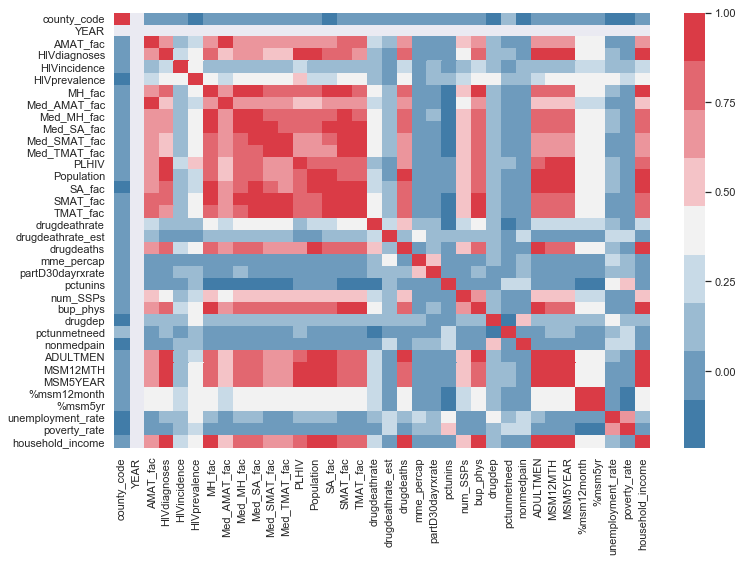

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
cmap = sns.diverging_palette(240, 10, n=9)
_ = sns.heatmap(corr_mat, ax=ax, cmap=cmap)

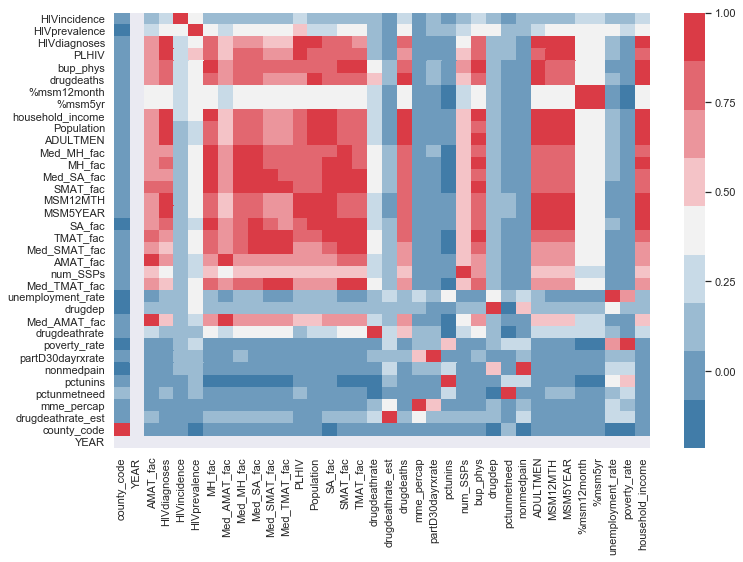

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
_ = sns.heatmap(corr_mat.sort_values(by='HIVincidence', ascending=False), ax=ax, cmap=cmap)

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


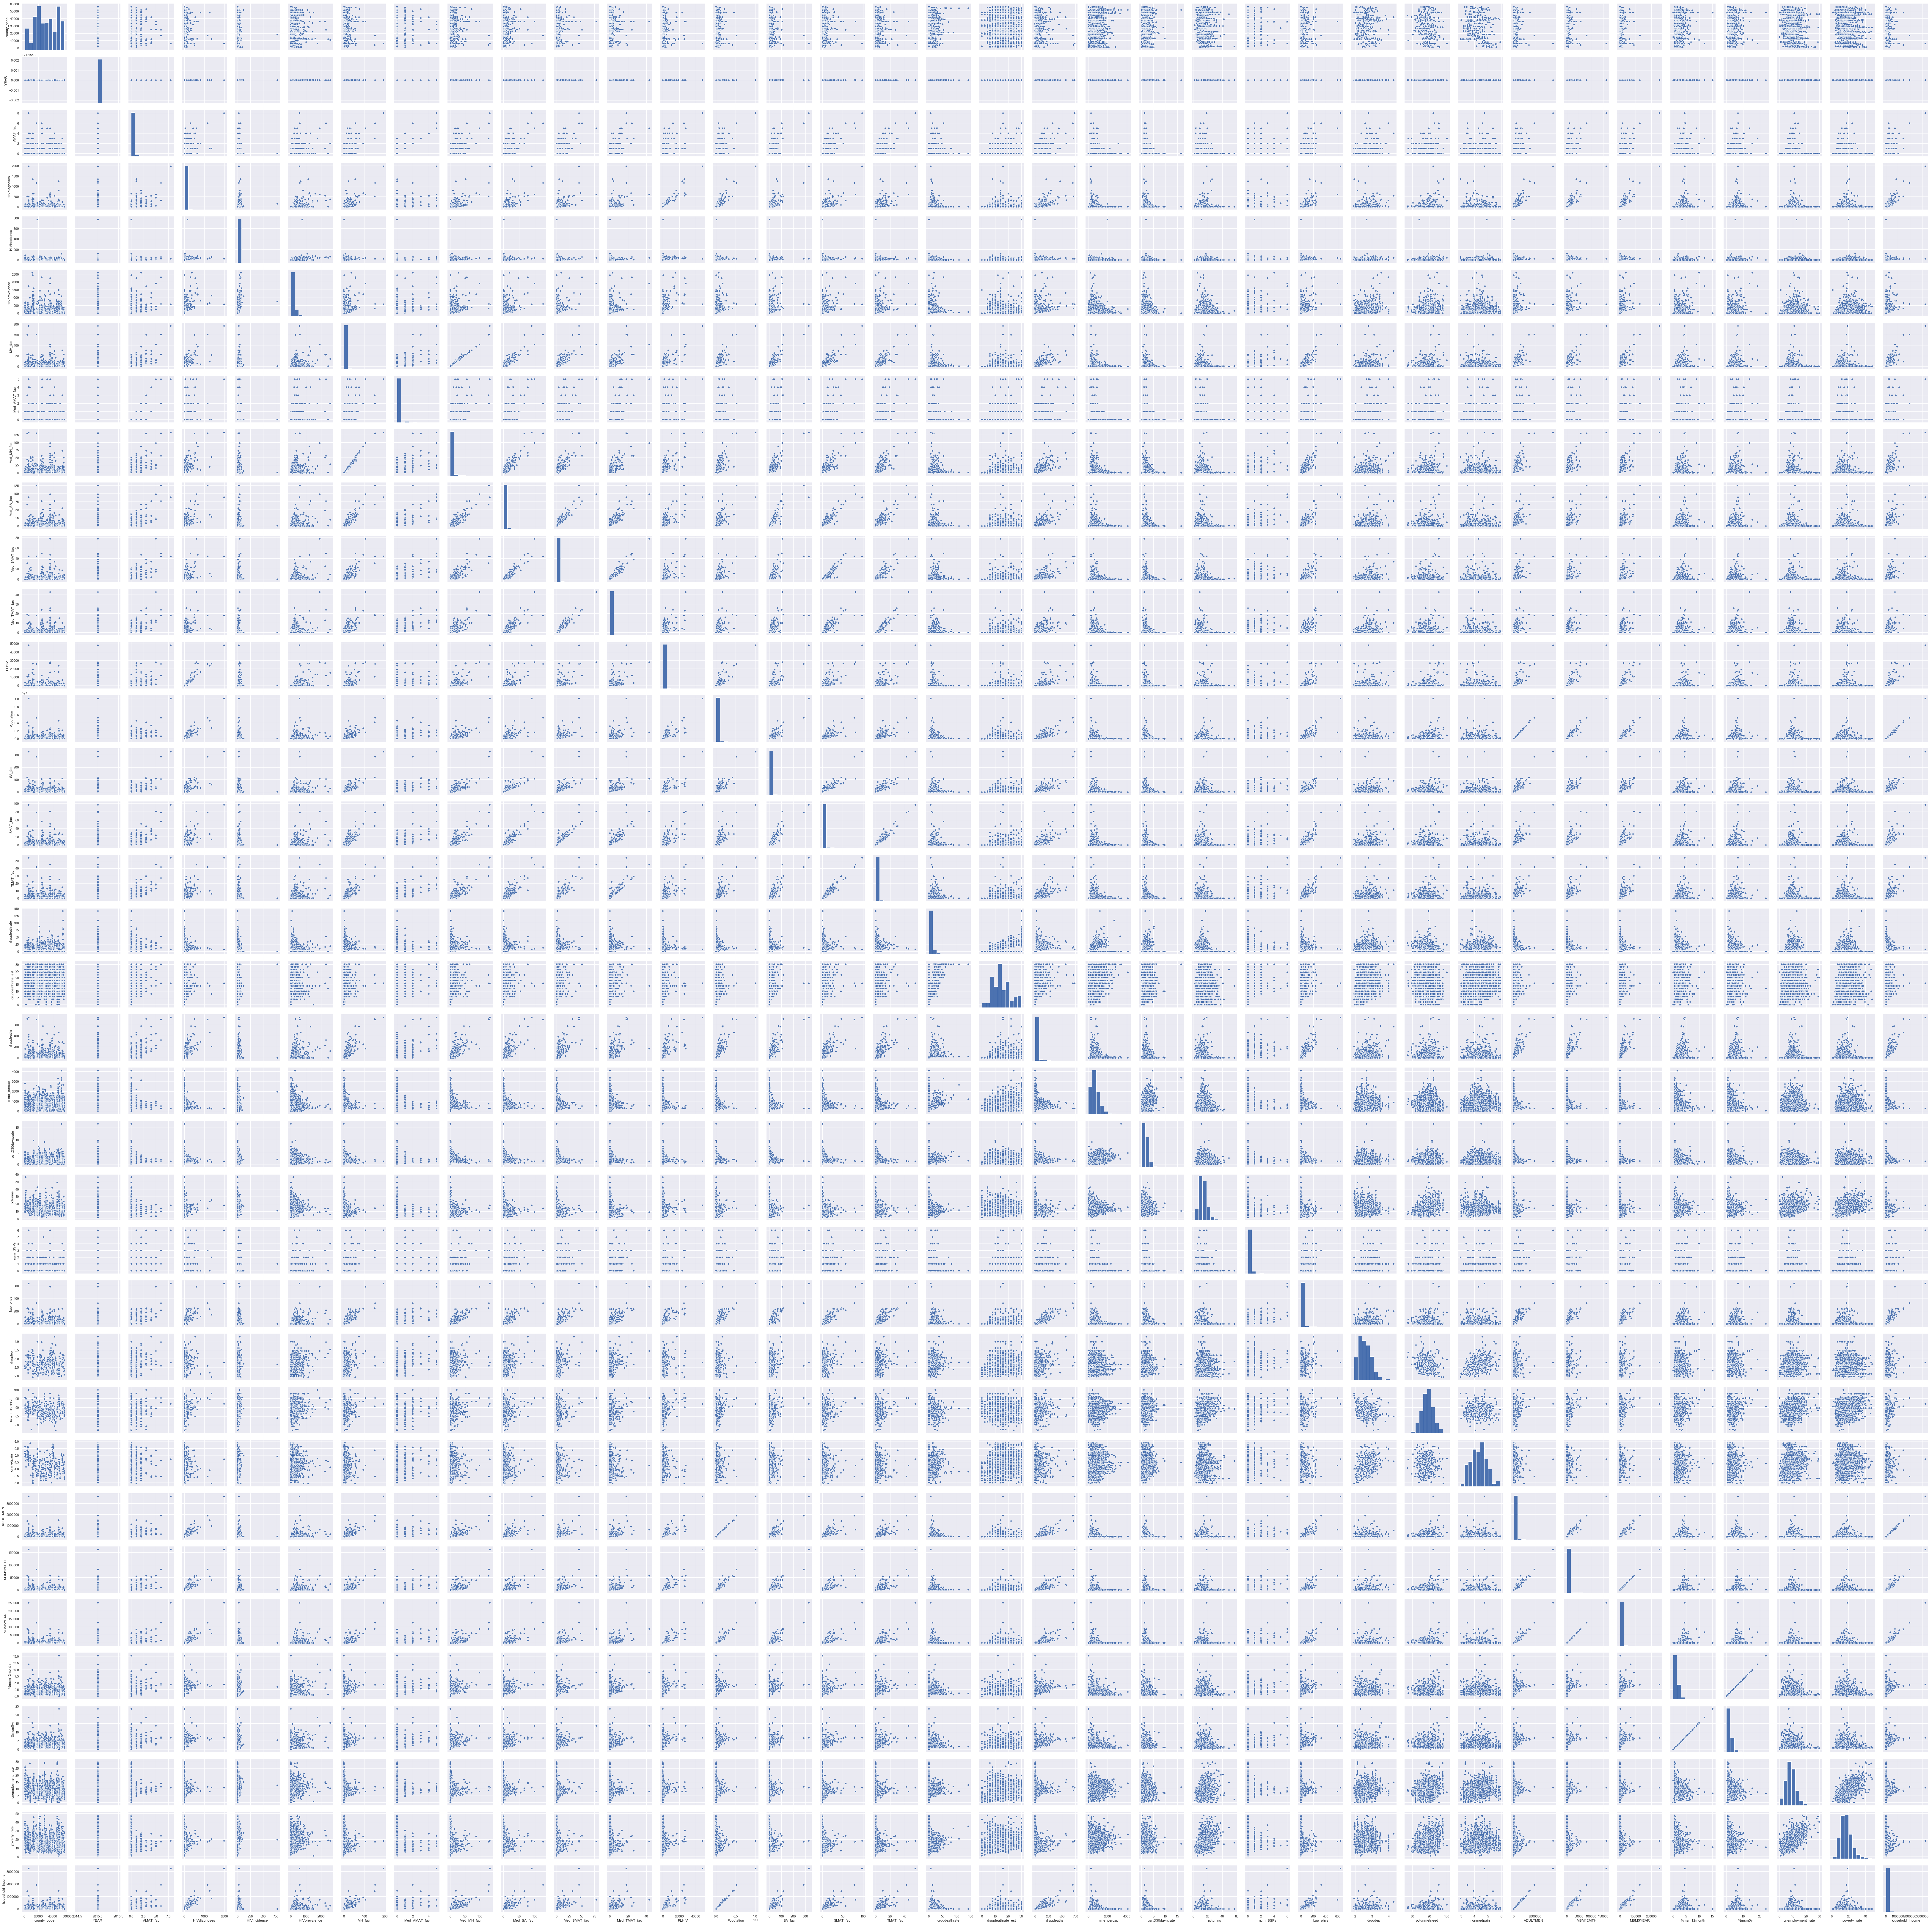

In [29]:
sns.pairplot(df)

In [33]:
df['STATEABBREVIATION'].value_counts()

TX    254
GA    159
VA    133
KY    120
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MI     83
MS     82
OK     77
AR     75
WI     72
FL     67
AL     67
PA     67
SD     65
CO     64
LA     64
NY     62
CA     58
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     33
UT     29
AK     28
MD     24
WY     23
NJ     21
NV     17
ME     16
AZ     15
VT     14
MA     14
NH     10
CT      8
HI      5
RI      5
DE      3
DC      1
Name: STATEABBREVIATION, dtype: int64

In [31]:
df['COUNTY'].value_counts()

Washington County      30
Jefferson County       25
Franklin County        24
Lincoln County         23
Jackson County         23
Madison County         19
Clay County            18
Montgomery County      18
Marion County          17
Monroe County          17
Union County           17
Wayne County           16
Grant County           14
Greene County          14
Warren County          14
Carroll County         13
Polk County            12
Clark County           12
Johnson County         12
Adams County           12
Marshall County        12
Lake County            12
Lee County             12
Douglas County         12
Calhoun County         11
Scott County           11
Fayette County         11
Lawrence County        11
Crawford County        11
Morgan County          11
                       ..
Dukes County            1
Kleberg County          1
Luzerne County          1
La Salle County         1
Llano County            1
Calumet County          1
Chelan County           1
Cambria Coun

## Variable histograms
It's hard to get a reasonable pairplot for the full dataset, so let's do histograms of all of our features.

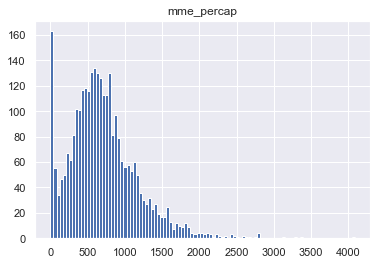

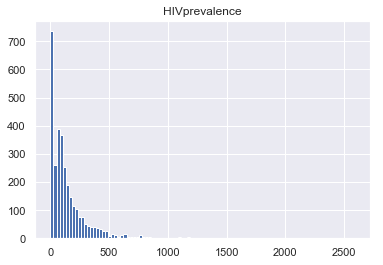

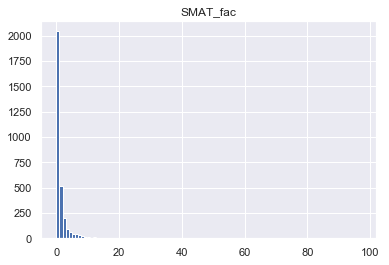

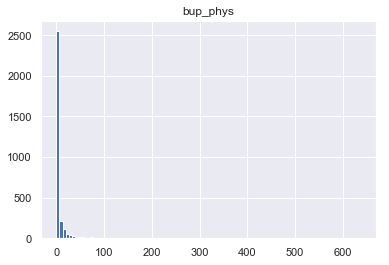

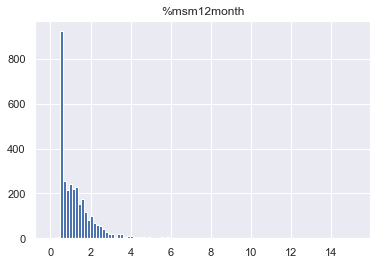

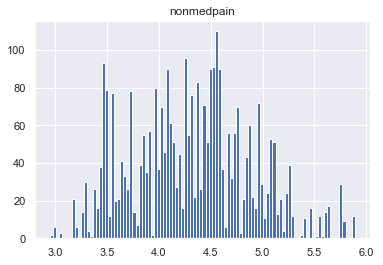

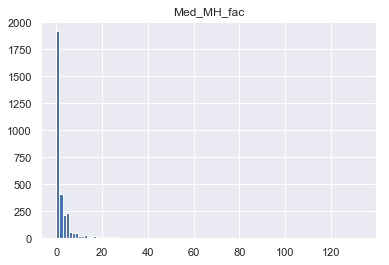

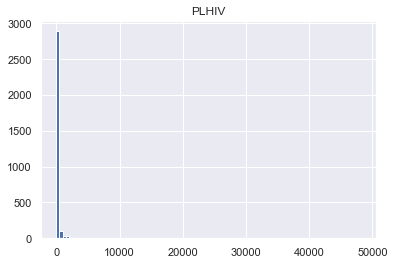

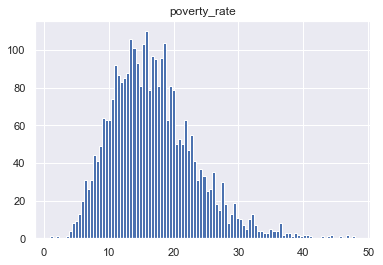

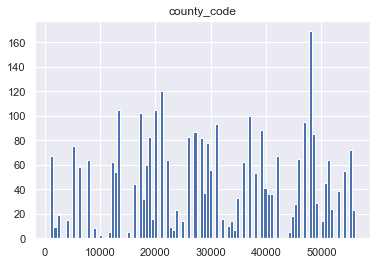

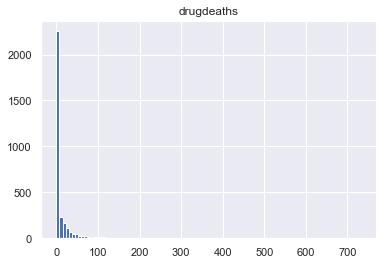

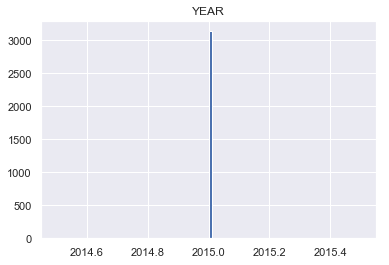

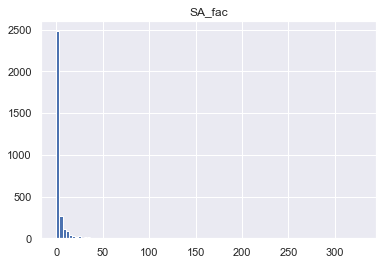

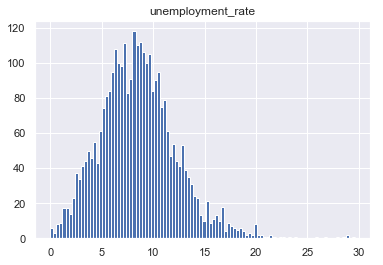

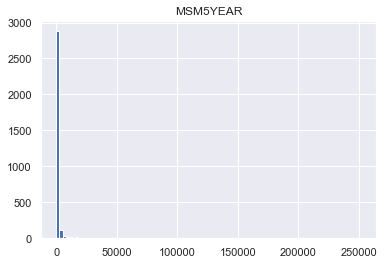

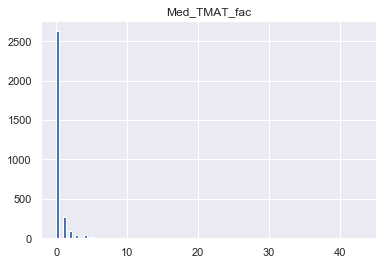

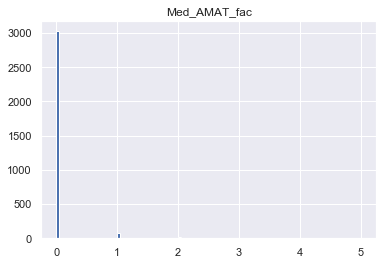

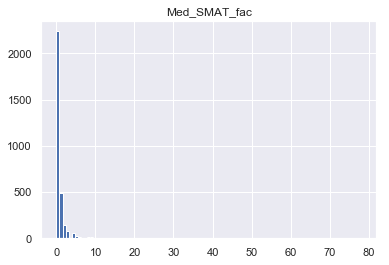

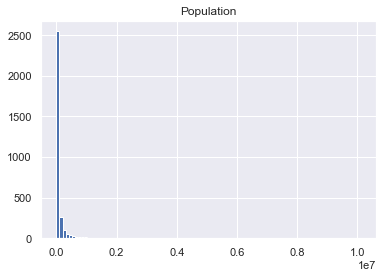

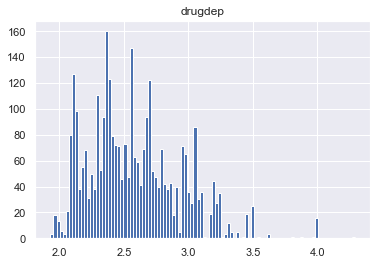

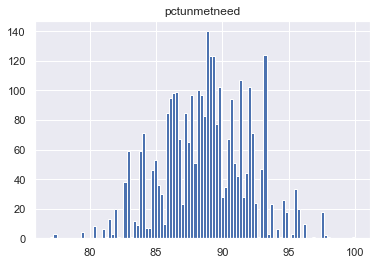

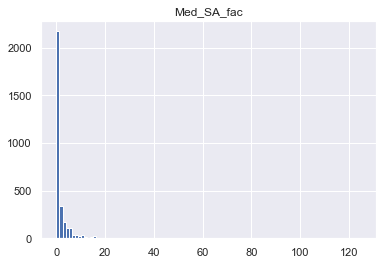

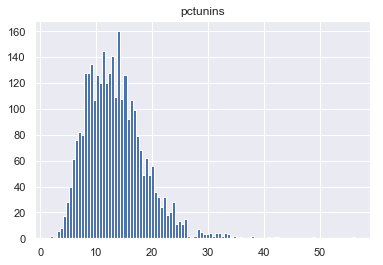

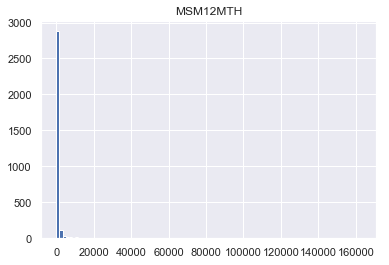

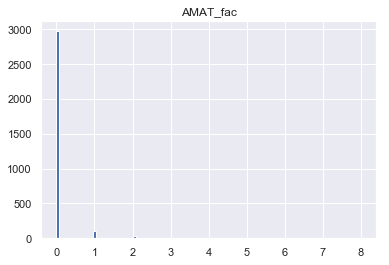

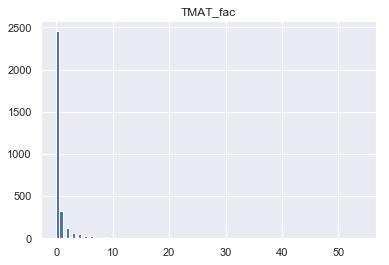

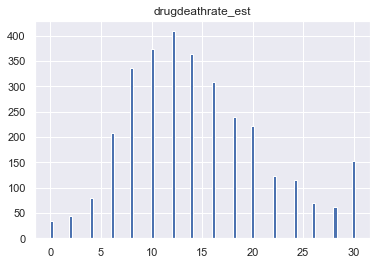

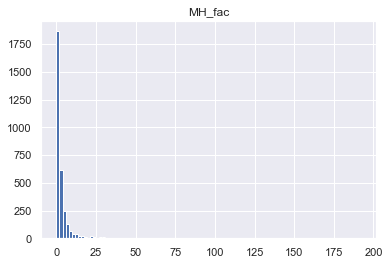

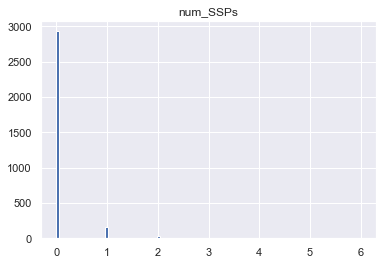

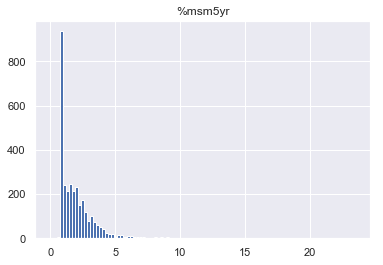

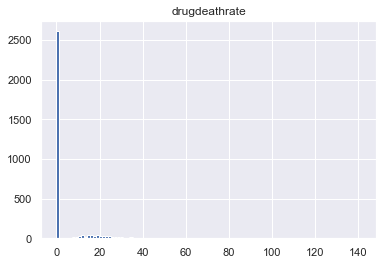

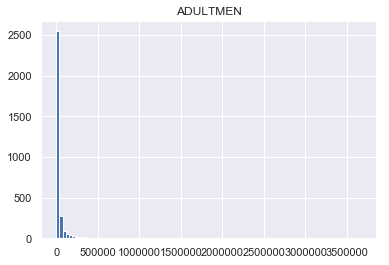

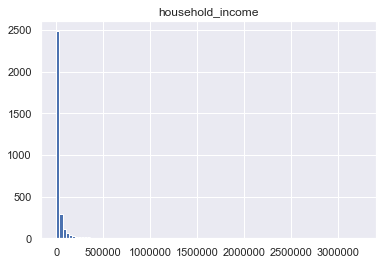

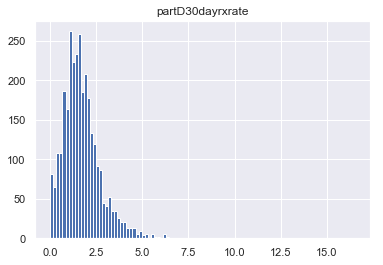

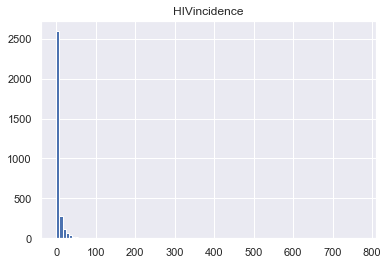

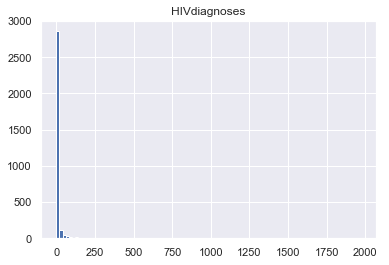

In [64]:
numeric_columns = set(df.columns)
numeric_columns.remove('COUNTY')
numeric_columns.remove('STATEABBREVIATION')

for col in numeric_columns:
    plt.hist(df[col], bins=100)
    plt.title(col)
    plt.show()

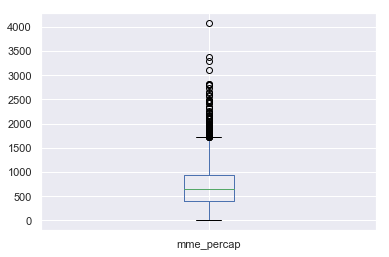

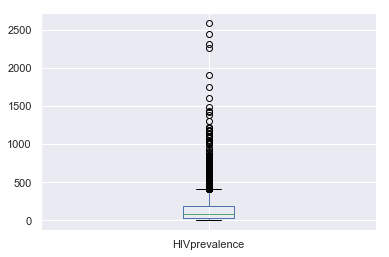

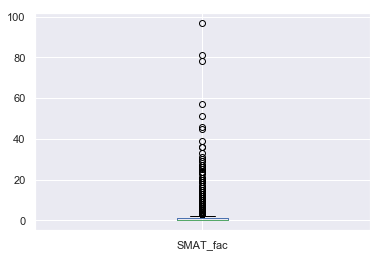

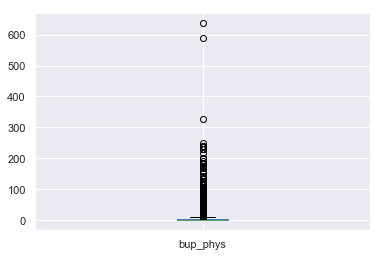

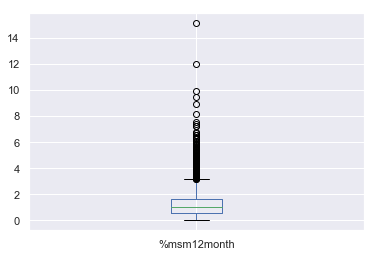

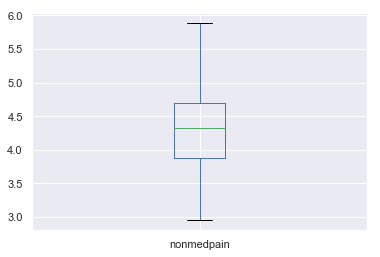

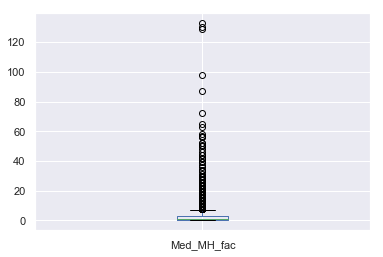

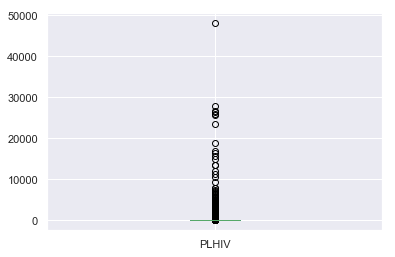

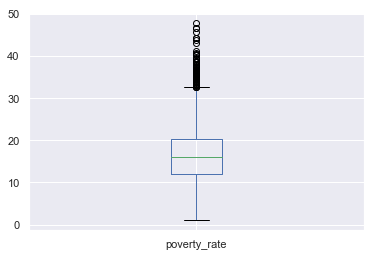

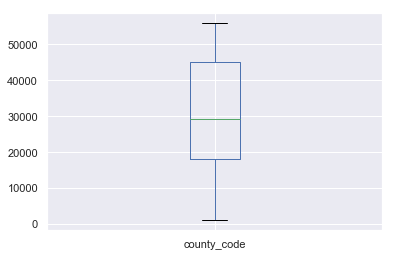

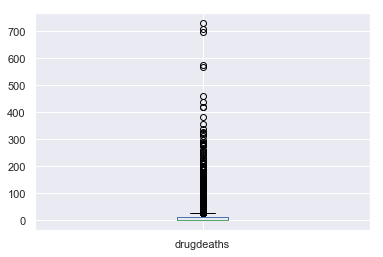

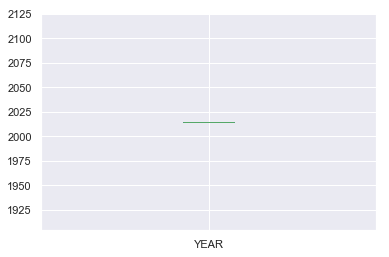

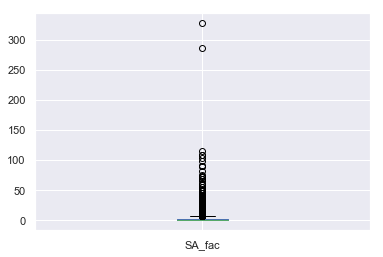

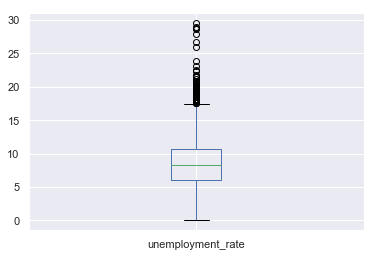

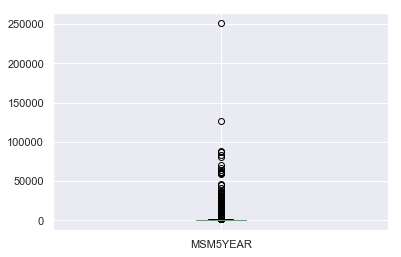

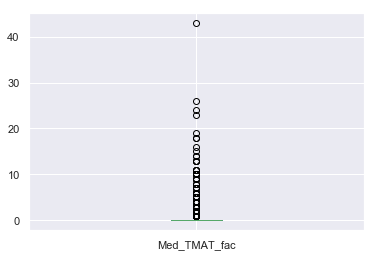

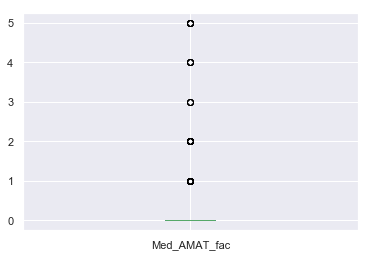

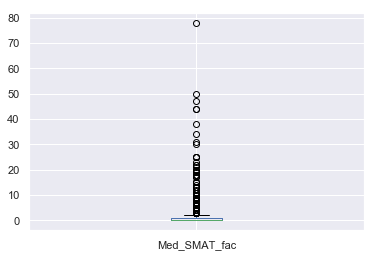

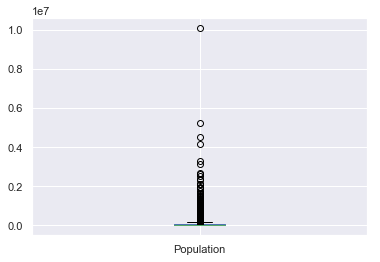

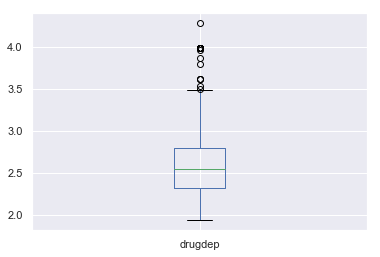

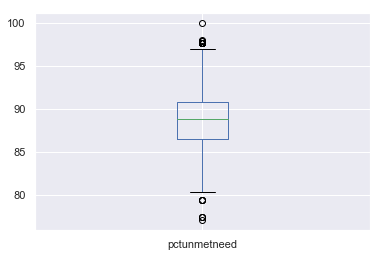

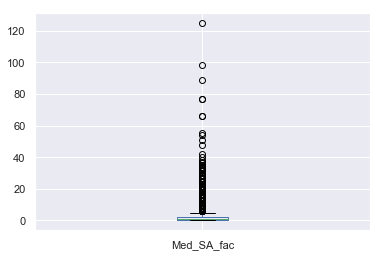

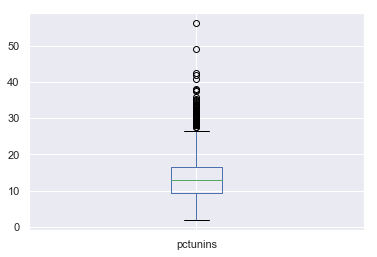

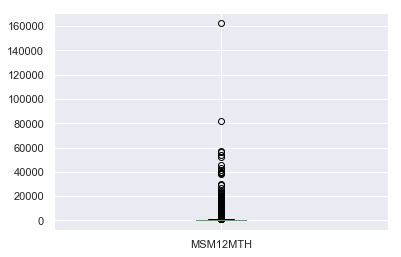

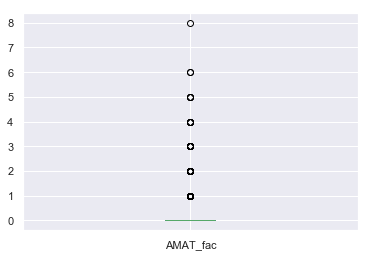

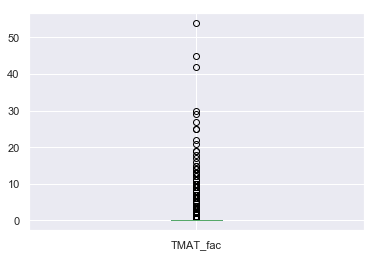

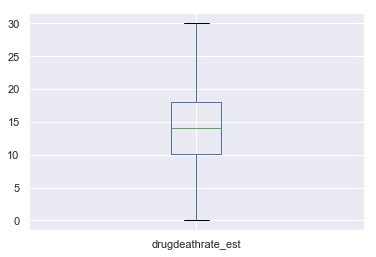

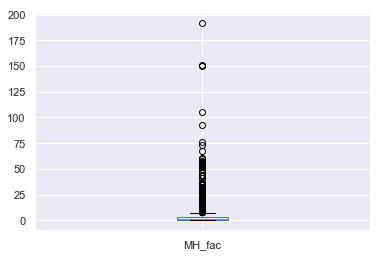

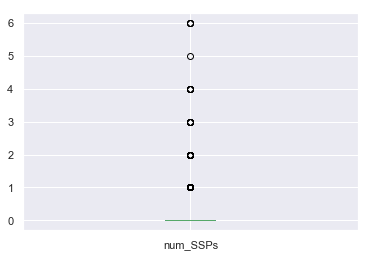

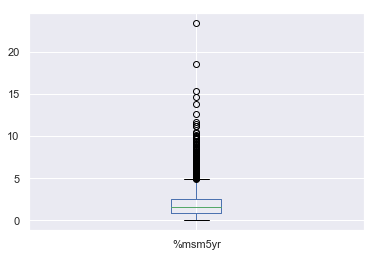

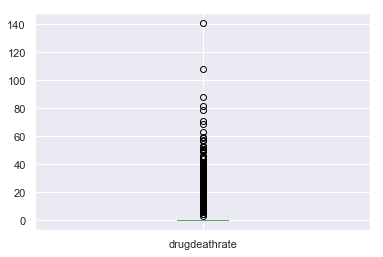

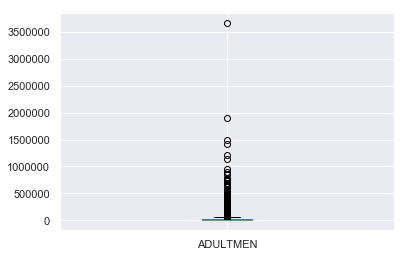

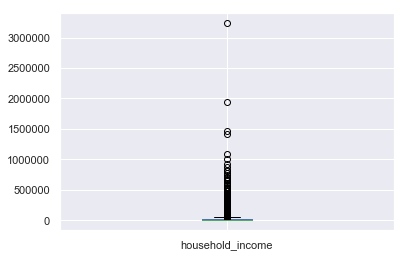

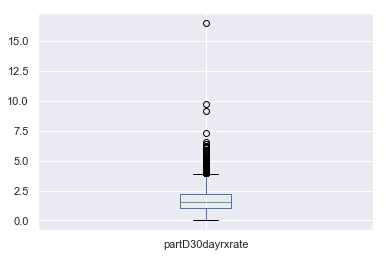

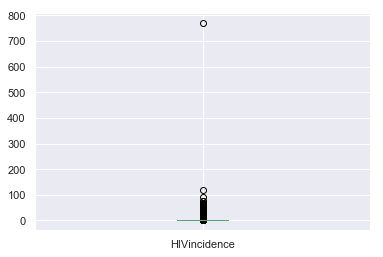

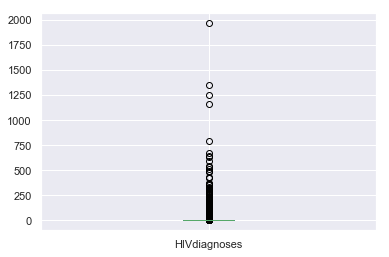

In [84]:
for col in numeric_columns:
    df.boxplot(col)
    plt.show()

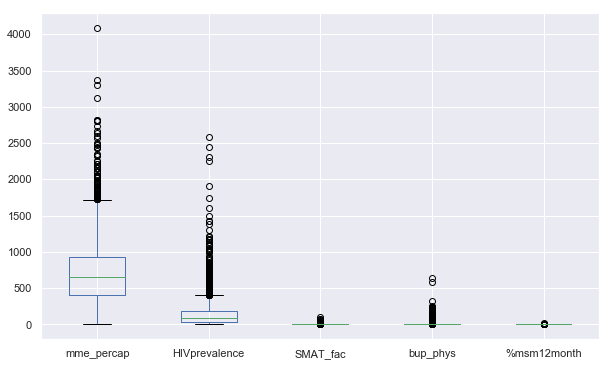

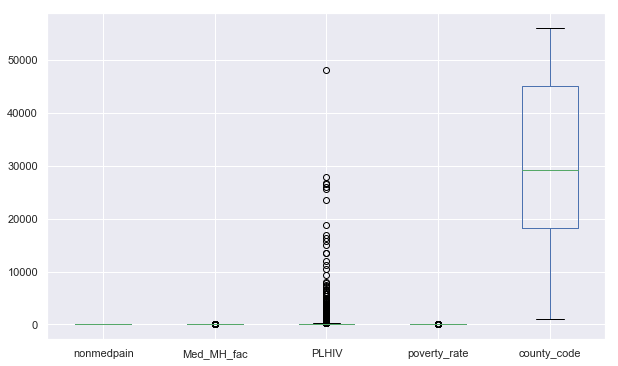

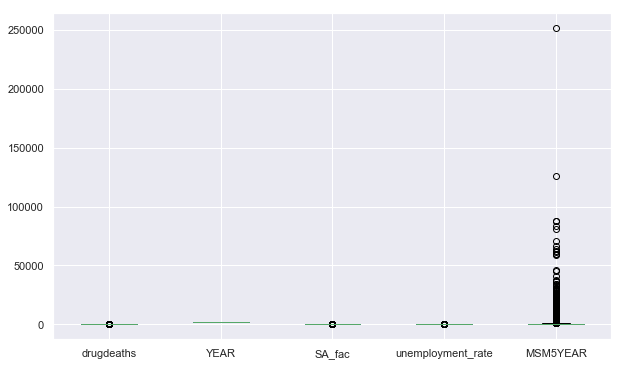

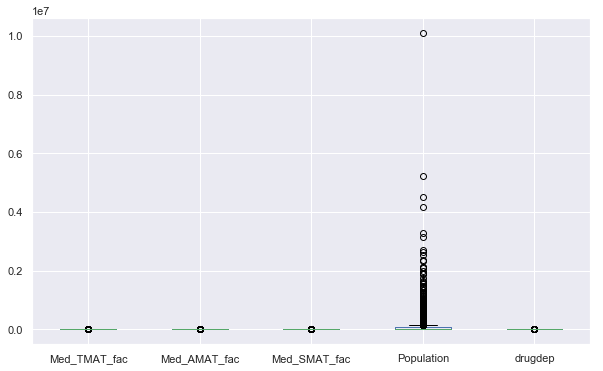

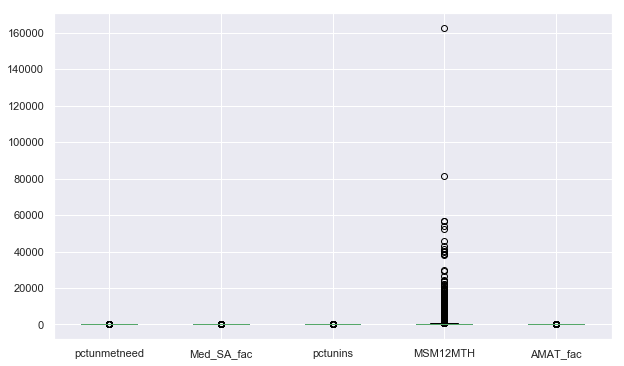

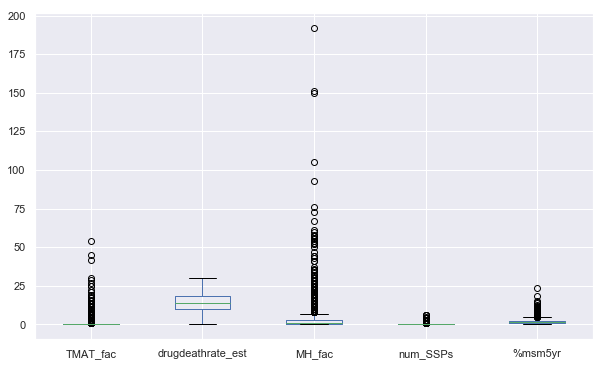

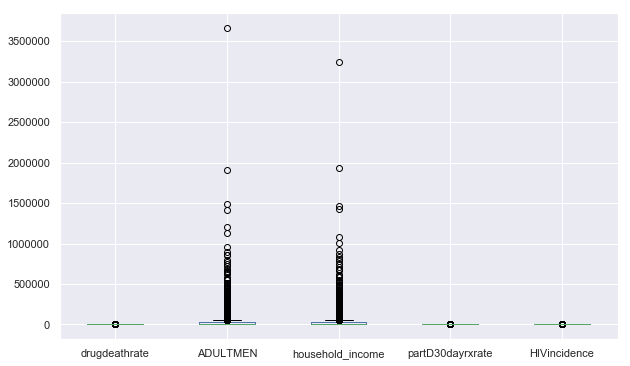

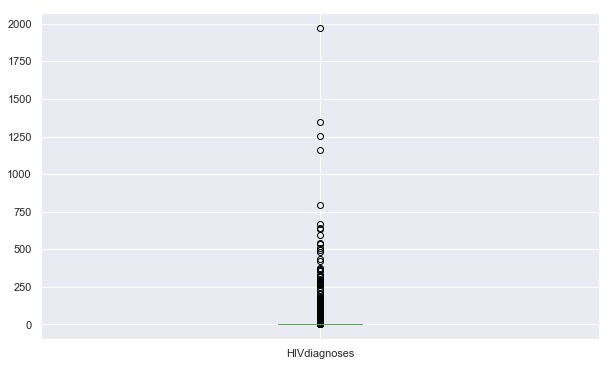

In [82]:
for i in list(range(0, len(df.columns), 5)):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    df.boxplot(list(numeric_columns)[i:i+5])
    plt.show()